In [110]:
import sys
import os
sys.path.append("pathto/utils")
import cellDensity
import draw
import clus
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

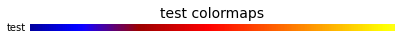

In [6]:
# build colorMap
cmap = draw.getColorMap() 
draw.plot_color_gradients("test", [cmap])

In [36]:
# read adata and transfer data 
adatabin50 = sc.read_h5ad("/home/share/ST_macaque/HIP_1015/HIP_macaque/bin50/macaque1/T33.h5ad")
adatacell = sc.read_h5ad("/home/share/ST_macaque/HIP_1015/HIP_macaque/cell/macaque1_926/T33.h5ad")
adatacell.obs["Cell_Type"] = adatacell.obs["rename"]

In [37]:
# adjust coordinates
adatabin50.obs["x"] = adatabin50.obsm["spatial"][:, 0] - np.min(adatabin50.obsm["spatial"][:, 0]) + 2
adatabin50.obs["y"] = adatabin50.obsm["spatial"][:, 1] - np.min(adatabin50.obsm["spatial"][:, 1]) + 2

adatacell.obs["x"] = adatacell.obsm["spatial"][:, 0] // 50 
adatacell.obs["y"] = adatacell.obsm["spatial"][:, 1] // 50

adatacell.obs["x"] = adatacell.obs["x"] - np.min(adatacell.obs["x"]) + 2 
adatacell.obs["y"] = adatacell.obs["y"] - np.min(adatacell.obs["y"]) + 2 

In [100]:
adatacelldensity = cellDensity.df2adata(adatacell.obs, adatabin50)
adatacelldensity = clus.smoothadata(adatacelldensity, s = 3)

/home/feity/HCgit/utils/cellDensity.py:38: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(g)
/home/feity/.conda/envs/tf/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


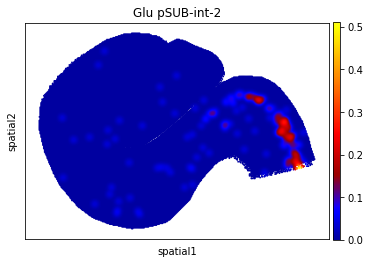

In [93]:
axis = plt.gca()
# adatacelldensity = clus.smoothadata(adatacelldensity, s = 3, trunc=10)
sc.pl.spatial(adatacelldensity, ax=axis, color="Glu pSUB-int-2", spot_size=2, cmap = cmap, use_raw=False)
draw.draw_sizebar(axis, 40, "1mm")


<AxesSubplot:>

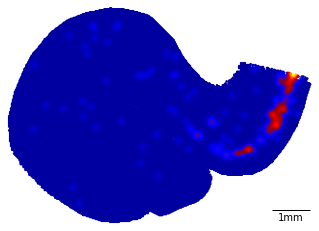

In [111]:
draw.drawSliceCmap(adatacelldensity, cmap, "Glu pSUB-int-2")